<a href="https://colab.research.google.com/github/zjzsu2000/257ML/blob/master/DT_on_Crunchbase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')



```
# This is formatted as code
```



In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Using Decision Trees Classifier and Random Forests to Find the Important Features of our Dataset（Feature Selection）

In [0]:
data = pd.read_csv("/content/drive/My Drive/MLSpring2020/AIInsight_CrunchbasePrediction/assignment/assignment_4_decisiontree/Crunchdataframe.csv",encoding= 'unicode_escape')

In [10]:
data.head(10)

,permalink,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at,Target,company_name,avg_time_bw_rounds,avg_raise_usd,time_bw_first_rounds,cat_list,country,state,float_avg_time_bw_rounds,float_time_bw_first_rounds
0,/company/1-800-dentist,1-800-DENTIST,health,NaN,operating,USA,CA,Los Angeles,Los Angeles,1,1986-01-01,1986-01,1986-Q1,1986.0,2010-08-19,2010-08-19,2010-08-19,0.0,1-800-DENTIST,NaN,NaN,0 days 00:00:00.000000000,health,USA,CA,NaN,0
1,/company/1000memories,1000memories,web,2535000,acquired,USA,CA,SF Bay,San Francisco,2,2010-07-01,2010-07,2010-Q3,2010.0,2010-01-01,2011-02-16,2013-07-04,1.0,1000memories,411 days 00:00:00.000000000,1.267500e+06,411 days 00:00:00.000000000,web,USA,CA,411.0,411
2,/company/100plus,100Plus,analytics,1250000,acquired,USA,CA,SF Bay,San Francisco,2,2011-09-16,2011-09,2011-Q3,2011.0,2011-11-02,2011-11-30,2013-02-27,1.0,100Plus,28 days 00:00:00.000000000,6.250000e+05,28 days 00:00:00.000000000,analytics,USA,CA,28.0,28
3,/company/1010data,1010data,software,35000000,operating,USA,NY,New York,New York,1,2000-01-01,2000-01,2000-Q1,2000.0,2010-03-08,2010-03-08,2012-01-01,0.0,1010data,NaN,3.500000e+07,0 days 00:00:00.000000000,software,USA,NY,NaN,0
4,/company/10bestthings,10BestThings,web,50000,operating,USA,OH,Cleveland,Cleveland,1,2009-04-01,2009-04,2009-Q2,2009.0,2009-04-01,2009-04-01,NaN,0.0,10BestThings,NaN,5.000000e+04,0 days 00:00:00.000000000,web,USA,0_other_state,NaN,0
5,/company/11i-solutions,11i Solutions,enterprise,1800000,closed,USA,AL,Huntsville,Huntsville,1,NaN,NaN,NaN,NaN,2011-03-22,2011-03-22,NaN,0.0,11i Solutions,NaN,1.800000e+06,0 days 00:00:00.000000000,enterprise,USA,0_other_state,NaN,0
6,/company/12society,12Society,ecommerce,NaN,acquired,USA,CA,Los Angeles,West Hollywood,1,2012-01-01,2012-01,2012-Q1,2012.0,2012-04-05,2012-04-05,2013-07-03,1.0,12Society,NaN,NaN,0 days 00:00:00.000000000,ecommerce,USA,CA,NaN,0
7,/company/1366-technologies,1366 Technologies,manufacturing,48950000,operating,USA,MA,Boston,Lexington,6,2007-01-01,2007-01,2007-Q1,2007.0,2008-03-27,2011-02-07,2011-06-17,0.0,1366 Technologies,209 days 09:36:00.000000000,8.158333e+06,678 days 00:00:00.000000000,manufacturing,USA,MA,209.0,678
8,/company/140fire,140Fire,advertising,500000,operating,USA,CA,Los Angeles,Santa Monica,1,2010-01-01,2010-01,2010-Q1,2010.0,2010-05-05,2010-05-05,2011-02-24,0.0,140Fire,NaN,5.000000e+05,0 days 00:00:00.000000000,advertising,USA,CA,NaN,0
9,/company/169-st,169 ST.,games_video,50000,operating,USA,FL,Orlando,Lake Mary,1,2009-05-15,2009-05,2009-Q2,2009.0,2009-06-01,2009-06-01,2009-05-01,0.0,169 ST.,NaN,5.000000e+04,0 days 00:00:00.000000000,games_video,USA,0_other_state,NaN,0


In [11]:
data.tail(10)

,permalink,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at,Target,company_name,avg_time_bw_rounds,avg_raise_usd,time_bw_first_rounds,cat_list,country,state,float_avg_time_bw_rounds,float_time_bw_first_rounds
7111,/company/zumeo-com,Zumeo.com,web,100000,operating,USA,OR,Medford,Medford,1,2007-05-01,2007-05,2007-Q2,2007.0,2009-01-29,2009-01-29,2009-02-06,0.0,Zumeo.com,NaN,1.000000e+05,0 days 00:00:00.000000000,web,USA,0_other_state,NaN,0
7112,/company/zumobi,Zumobi,mobile,12000000,operating,USA,WA,Seattle,Seattle,1,2007-03-01,2007-03,2007-Q1,2007.0,2007-05-07,2007-05-07,2011-12-17,0.0,Zumobi,NaN,1.200000e+07,0 days 00:00:00.000000000,mobile,USA,0_other_state,NaN,0
7113,/company/zuujit,Zuujit,ecommerce,2700000,operating,USA,CA,Santa Barbara,Santa Barbara,1,2010-01-01,2010-01,2010-Q1,2010.0,2010-04-30,2010-04-30,NaN,0.0,Zuujit,NaN,2.700000e+06,0 days 00:00:00.000000000,ecommerce,USA,CA,NaN,0
7114,/company/zvents,Zvents,web,31200000,acquired,USA,CA,SF Bay,San Mateo,3,2005-03-01,2005-03,2005-Q1,2005.0,2005-10-05,2008-09-30,2012-09-11,1.0,Zvents,545 days 12:00:00.000000000,1.040000e+07,398 days 00:00:00.000000000,web,USA,CA,545.0,398
7115,/company/zweemie,Zweemie,messaging,250000,operating,USA,MI,Grand Blanc,Grand Blanc,1,2009-01-01,2009-01,2009-Q1,2009.0,2010-06-03,2010-06-03,NaN,0.0,Zweemie,NaN,2.500000e+05,0 days 00:00:00.000000000,messaging,USA,0_other_state,NaN,0
7116,/company/zygo-corporation,Zygo Corporation,manufacturing,9000000,ipo,USA,CT,Middlefield,Middlefield,1,NaN,NaN,NaN,NaN,2011-10-24,2011-10-24,2011-07-01,1.0,Zygo Corporation,NaN,9.000000e+06,0 days 00:00:00.000000000,manufacturing,USA,0_other_state,NaN,0
7117,/company/zykis,Zykis,public_relations,800000,operating,USA,CA,Los Angeles,Irvine,1,2006-10-27,2006-10,2006-Q4,2006.0,2006-10-27,2006-10-27,NaN,0.0,Zykis,NaN,8.000000e+05,0 days 00:00:00.000000000,public_relations,USA,CA,NaN,0
7118,/company/zymetis,Zymetis,biotech,2257464,operating,USA,MD,Washington DC,College Park,2,2006-01-01,2006-01,2006-Q1,2006.0,2010-01-11,2010-01-31,NaN,0.0,Zymetis,20 days 00:00:00.000000000,1.128732e+06,20 days 00:00:00.000000000,biotech,USA,0_other_state,20.0,20
7119,/company/zynga,Zynga,games_video,860213000,ipo,USA,CA,SF Bay,San Francisco,8,2007-07-01,2007-07,2007-Q3,2007.0,2007-01-01,2011-02-18,2013-09-30,1.0,Zynga,215 days 13:42:51.428571428,1.228876e+08,365 days 00:00:00.000000000,games_video,USA,CA,215.0,365
7120,/company/zyngenia,Zyngenia,biotech,25000000,operating,USA,MD,Washington DC,Gaithersburg,1,2008-01-01,2008-01,2008-Q1,2008.0,2010-09-09,2010-09-09,NaN,0.0,Zyngenia,NaN,2.500000e+07,0 days 00:00:00.000000000,biotech,USA,0_other_state,NaN,0


In [12]:
data.dtypes

permalink                      object
name                           object
category_code                  object
funding_total_usd              object
status                         object
country_code                   object
state_code                     object
region                         object
city                           object
funding_rounds                  int64
founded_at                     object
founded_month                  object
founded_quarter                object
founded_year                  float64
first_funding_at               object
last_funding_at                object
last_milestone_at              object
Target                        float64
company_name                   object
avg_time_bw_rounds             object
avg_raise_usd                 float64
time_bw_first_rounds           object
cat_list                       object
country                        object
state                          object
float_avg_time_bw_rounds      float64
float_time_b

In [13]:
data.shape

(7121, 27)

There are 27 features here,it is too many to apply any ML algorithm.So we must reduce dimension here.

Removing the unimportant features will help with memory, computational cost and the accuracy of our model.Also, it will help to avoid the overfitting. 

Sometimes, a feature that makes business sense, but it doesn’t mean that this feature will help us with our prediction.

But Which features are more important？ 


#How to find the important features is really a important question.
Here, we will  use Desision Tree  algorithm to find them.

Some features (such as state,country) are duplicate and some of them (such as permalink,company_name) will not help us with our prediction.We drop them first.

In [0]:
data.drop(['permalink'], axis=1, inplace = True)

In [0]:
data.drop(['company_name'], axis=1, inplace = True)

In [0]:
data.drop(['founded_at'], axis=1, inplace = True)

We keep the "name"  here,but just for ID, not using it as the features.

In [0]:
data.drop(['country'], axis=1, inplace = True)

In [0]:
data.drop(['state'], axis=1, inplace = True)

Some of other features don't seem to be the things that explicitly impacts success, but they impact investment funding as well as price of the company.

In [19]:
data.shape

(7121, 22)

So let's apply DT to find the important ones.

Let's find the data of the features which are null？ DT should be applied with no null data.

In [20]:
missing_data = data.isnull().sum().sort_values(ascending = False)
missing_data_rate = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
print(missing_data_rate)

avg_time_bw_rounds            0.652577
float_avg_time_bw_rounds      0.652577
last_milestone_at             0.376913
founded_quarter               0.214577
founded_year                  0.214577
founded_month                 0.214577
avg_raise_usd                 0.101531
funding_total_usd             0.101390
city                          0.019379
category_code                 0.000000
status                        0.000000
country_code                  0.000000
state_code                    0.000000
region                        0.000000
float_time_bw_first_rounds    0.000000
funding_rounds                0.000000
first_funding_at              0.000000
last_funding_at               0.000000
Target                        0.000000
time_bw_first_rounds          0.000000
cat_list                      0.000000
name                          0.000000
dtype: float64


There are 7121 data here.

Some features are too many missing data(such as "avg_time_bw_rounds"), it does n’t make much sense to keep or fill, so they also should be deleted.

In [0]:
data.drop(['avg_time_bw_rounds'], axis=1, inplace = True)

In [0]:
data.drop(['float_avg_time_bw_rounds'],axis=1,inplace=True)

Some features are not too many missing(such as "city"),we can just remove the missing data.

In [0]:
data.dropna(subset=['city'],axis=0, inplace = True)

In [24]:
data.isnull().sum().sort_values(ascending = False)

last_milestone_at             2629
founded_month                 1484
founded_year                  1484
founded_quarter               1484
avg_raise_usd                  693
funding_total_usd              692
city                             0
category_code                    0
status                           0
country_code                     0
state_code                       0
region                           0
float_time_bw_first_rounds       0
funding_rounds                   0
cat_list                         0
first_funding_at                 0
last_funding_at                  0
Target                           0
time_bw_first_rounds             0
name                             0
dtype: int64

Filling others with mean

In [0]:
noempty= data.fillna(data.mean())

In [0]:
final = noempty.fillna(0)

In [27]:
final.isna().sum()

name                          0
category_code                 0
funding_total_usd             0
status                        0
country_code                  0
state_code                    0
region                        0
city                          0
funding_rounds                0
founded_month                 0
founded_quarter               0
founded_year                  0
first_funding_at              0
last_funding_at               0
last_milestone_at             0
Target                        0
avg_raise_usd                 0
time_bw_first_rounds          0
cat_list                      0
float_time_bw_first_rounds    0
dtype: int64

In [0]:
pd.set_option('display.max_columns', None)

In [29]:
final.shape

(6983, 20)

In [30]:
final.dtypes

name                           object
category_code                  object
funding_total_usd              object
status                         object
country_code                   object
state_code                     object
region                         object
city                           object
funding_rounds                  int64
founded_month                  object
founded_quarter                object
founded_year                  float64
first_funding_at               object
last_funding_at                object
last_milestone_at              object
Target                        float64
avg_raise_usd                 float64
time_bw_first_rounds           object
cat_list                       object
float_time_bw_first_rounds      int64
dtype: object

In [31]:
final.head(10)

,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at,Target,avg_raise_usd,time_bw_first_rounds,cat_list,float_time_bw_first_rounds
0,1-800-DENTIST,health,0,operating,USA,CA,Los Angeles,Los Angeles,1,1986-01,1986-Q1,1986.000000,2010-08-19,2010-08-19,2010-08-19,0.0,1.085854e+07,0 days 00:00:00.000000000,health,0
1,1000memories,web,2535000,acquired,USA,CA,SF Bay,San Francisco,2,2010-07,2010-Q3,2010.000000,2010-01-01,2011-02-16,2013-07-04,1.0,1.267500e+06,411 days 00:00:00.000000000,web,411
2,100Plus,analytics,1250000,acquired,USA,CA,SF Bay,San Francisco,2,2011-09,2011-Q3,2011.000000,2011-11-02,2011-11-30,2013-02-27,1.0,6.250000e+05,28 days 00:00:00.000000000,analytics,28
3,1010data,software,35000000,operating,USA,NY,New York,New York,1,2000-01,2000-Q1,2000.000000,2010-03-08,2010-03-08,2012-01-01,0.0,3.500000e+07,0 days 00:00:00.000000000,software,0
4,10BestThings,web,50000,operating,USA,OH,Cleveland,Cleveland,1,2009-04,2009-Q2,2009.000000,2009-04-01,2009-04-01,0,0.0,5.000000e+04,0 days 00:00:00.000000000,web,0
5,11i Solutions,enterprise,1800000,closed,USA,AL,Huntsville,Huntsville,1,0,0,2004.064739,2011-03-22,2011-03-22,0,0.0,1.800000e+06,0 days 00:00:00.000000000,enterprise,0
6,12Society,ecommerce,0,acquired,USA,CA,Los Angeles,West Hollywood,1,2012-01,2012-Q1,2012.000000,2012-04-05,2012-04-05,2013-07-03,1.0,1.085854e+07,0 days 00:00:00.000000000,ecommerce,0
7,1366 Technologies,manufacturing,48950000,operating,USA,MA,Boston,Lexington,6,2007-01,2007-Q1,2007.000000,2008-03-27,2011-02-07,2011-06-17,0.0,8.158333e+06,678 days 00:00:00.000000000,manufacturing,678
8,140Fire,advertising,500000,operating,USA,CA,Los Angeles,Santa Monica,1,2010-01,2010-Q1,2010.000000,2010-05-05,2010-05-05,2011-02-24,0.0,5.000000e+05,0 days 00:00:00.000000000,advertising,0
9,169 ST.,games_video,50000,operating,USA,FL,Orlando,Lake Mary,1,2009-05,2009-Q2,2009.000000,2009-06-01,2009-06-01,2009-05-01,0.0,5.000000e+04,0 days 00:00:00.000000000,games_video,0


In [32]:
final.tail(10)

,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at,Target,avg_raise_usd,time_bw_first_rounds,cat_list,float_time_bw_first_rounds
7111,Zumeo.com,web,100000,operating,USA,OR,Medford,Medford,1,2007-05,2007-Q2,2007.000000,2009-01-29,2009-01-29,2009-02-06,0.0,1.000000e+05,0 days 00:00:00.000000000,web,0
7112,Zumobi,mobile,12000000,operating,USA,WA,Seattle,Seattle,1,2007-03,2007-Q1,2007.000000,2007-05-07,2007-05-07,2011-12-17,0.0,1.200000e+07,0 days 00:00:00.000000000,mobile,0
7113,Zuujit,ecommerce,2700000,operating,USA,CA,Santa Barbara,Santa Barbara,1,2010-01,2010-Q1,2010.000000,2010-04-30,2010-04-30,0,0.0,2.700000e+06,0 days 00:00:00.000000000,ecommerce,0
7114,Zvents,web,31200000,acquired,USA,CA,SF Bay,San Mateo,3,2005-03,2005-Q1,2005.000000,2005-10-05,2008-09-30,2012-09-11,1.0,1.040000e+07,398 days 00:00:00.000000000,web,398
7115,Zweemie,messaging,250000,operating,USA,MI,Grand Blanc,Grand Blanc,1,2009-01,2009-Q1,2009.000000,2010-06-03,2010-06-03,0,0.0,2.500000e+05,0 days 00:00:00.000000000,messaging,0
7116,Zygo Corporation,manufacturing,9000000,ipo,USA,CT,Middlefield,Middlefield,1,0,0,2004.064739,2011-10-24,2011-10-24,2011-07-01,1.0,9.000000e+06,0 days 00:00:00.000000000,manufacturing,0
7117,Zykis,public_relations,800000,operating,USA,CA,Los Angeles,Irvine,1,2006-10,2006-Q4,2006.000000,2006-10-27,2006-10-27,0,0.0,8.000000e+05,0 days 00:00:00.000000000,public_relations,0
7118,Zymetis,biotech,2257464,operating,USA,MD,Washington DC,College Park,2,2006-01,2006-Q1,2006.000000,2010-01-11,2010-01-31,0,0.0,1.128732e+06,20 days 00:00:00.000000000,biotech,20
7119,Zynga,games_video,860213000,ipo,USA,CA,SF Bay,San Francisco,8,2007-07,2007-Q3,2007.000000,2007-01-01,2011-02-18,2013-09-30,1.0,1.228876e+08,365 days 00:00:00.000000000,games_video,365
7120,Zyngenia,biotech,25000000,operating,USA,MD,Washington DC,Gaithersburg,1,2008-01,2008-Q1,2008.000000,2010-09-09,2010-09-09,0,0.0,2.500000e+07,0 days 00:00:00.000000000,biotech,0


Encoder to number

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
number = LabelEncoder()


In [0]:
final['city'] = number.fit_transform(final['city'].astype(str))

In [36]:
#classify and convert the object into numerical
final['category_code'].value_counts()

software            1240
web                  938
biotech              596
mobile               408
games_video          376
enterprise           373
cleantech            311
advertising          294
hardware             243
ecommerce            227
unknown              225
network_hosting      187
public_relations     167
semiconductor        165
other                137
security             117
analytics             99
medical               96
consulting            86
search                84
finance               75
messaging             67
health                67
social                63
education             47
news                  41
manufacturing         36
travel                34
music                 30
hospitality           24
sports                20
real_estate           19
photo_video           17
legal                 15
fashion               14
automotive            11
nonprofit             10
transportation        10
nanotech               7
design                 4


In [0]:
final['category_code'] = number.fit_transform(final['category_code'].astype(str))

In [38]:
final['category_code'].value_counts()

36    1240
41     938
3      596
22     408
12     376
9      373
4      311
0      294
14     243
7      227
40     225
25     187
30     167
34     165
28     137
33     117
1       99
20      96
5       86
32      84
11      75
15      67
21      67
35      63
8       47
26      41
19      36
39      34
23      30
16      24
37      20
31      19
29      17
17      15
10      14
2       11
38      10
27      10
24       7
6        4
13       2
18       1
Name: category_code, dtype: int64

In [39]:
final['funding_total_usd'].value_counts()#it is number

0           692
1000000     162
10000000    158
5000000     151
500000      135
           ... 
4000          1
115000        1
74200000      1
1464200       1
27400000      1
Name: funding_total_usd, Length: 1730, dtype: int64

In [0]:
final['status'] = number.fit_transform(final['status'].astype(str))

In [41]:
final.dtypes

name                           object
category_code                   int64
funding_total_usd              object
status                          int64
country_code                   object
state_code                     object
region                         object
city                            int64
funding_rounds                  int64
founded_month                  object
founded_quarter                object
founded_year                  float64
first_funding_at               object
last_funding_at                object
last_milestone_at              object
Target                        float64
avg_raise_usd                 float64
time_bw_first_rounds           object
cat_list                       object
float_time_bw_first_rounds      int64
dtype: object

In [42]:
final.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['name', 'category_code', 'funding_total_usd', 'status', 'country_code',
       'state_code', 'region', 'city', 'funding_rounds', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'last_milestone_at', 'Target', 'avg_raise_usd',
       'time_bw_first_rounds', 'cat_list', 'float_time_bw_first_rounds'],
      dtype='object')>

In [43]:
final.head()

,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at,Target,avg_raise_usd,time_bw_first_rounds,cat_list,float_time_bw_first_rounds
0,1-800-DENTIST,15,0,3,USA,CA,Los Angeles,488,1,1986-01,1986-Q1,1986.0,2010-08-19,2010-08-19,2010-08-19,0.0,1.085854e+07,0 days 00:00:00.000000000,health,0
1,1000memories,41,2535000,0,USA,CA,SF Bay,813,2,2010-07,2010-Q3,2010.0,2010-01-01,2011-02-16,2013-07-04,1.0,1.267500e+06,411 days 00:00:00.000000000,web,411
2,100Plus,1,1250000,0,USA,CA,SF Bay,813,2,2011-09,2011-Q3,2011.0,2011-11-02,2011-11-30,2013-02-27,1.0,6.250000e+05,28 days 00:00:00.000000000,analytics,28
3,1010data,36,35000000,3,USA,NY,New York,621,1,2000-01,2000-Q1,2000.0,2010-03-08,2010-03-08,2012-01-01,0.0,3.500000e+07,0 days 00:00:00.000000000,software,0
4,10BestThings,41,50000,3,USA,OH,Cleveland,185,1,2009-04,2009-Q2,2009.0,2009-04-01,2009-04-01,0,0.0,5.000000e+04,0 days 00:00:00.000000000,web,0


In [0]:
final['country_code'] = number.fit_transform(final['country_code'].astype(str))

In [0]:
final['state_code'] = number.fit_transform(final['state_code'].astype(str))

In [0]:
final['region'] = number.fit_transform(final['region'].astype(str))

In [0]:
final['city'] = number.fit_transform(final['city'].astype(str)) 
final['founded_month'] = number.fit_transform(final['founded_month'].astype(str)) 
final['founded_quarter'] = number.fit_transform(final['founded_quarter'].astype(str)) 
final['first_funding_at'] = number.fit_transform(final['first_funding_at'].astype(str))
final['last_funding_at'] = number.fit_transform(final['last_funding_at'].astype(str))
final['last_milestone_at'] = number.fit_transform(final['last_milestone_at'].astype(str))
final['cat_list'] = number.fit_transform(final['cat_list'].astype(str))  

In [0]:
final.drop(['time_bw_first_rounds'],axis=1,inplace=True) #which is present with "float_time_bw_first_rounds"

In [49]:
final.dtypes

name                           object
category_code                   int64
funding_total_usd              object
status                          int64
country_code                    int64
state_code                      int64
region                          int64
city                            int64
funding_rounds                  int64
founded_month                   int64
founded_quarter                 int64
founded_year                  float64
first_funding_at                int64
last_funding_at                 int64
last_milestone_at               int64
Target                        float64
avg_raise_usd                 float64
cat_list                        int64
float_time_bw_first_rounds      int64
dtype: object

In [0]:
final["funding_total_usd"] = number.fit_transform(final['funding_total_usd'].astype(str))

In [51]:
final["funding_total_usd"].value_counts()

1       692
7       162
8       158
1209    151
1208    135
       ... 
786       1
790       1
798       1
810       1
1725      1
Name: funding_total_usd, Length: 1730, dtype: int64

In [52]:
final.head()

,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at,Target,avg_raise_usd,cat_list,float_time_bw_first_rounds
0,1-800-DENTIST,15,1,3,0,3,215,495,1,37,36,1986.0,1537,1436,534,0.0,1.085854e+07,15,0
1,1000memories,41,688,0,0,3,359,857,2,218,114,2010.0,1370,1581,1240,1.0,1.267500e+06,41,411
2,100Plus,1,188,0,0,3,359,857,2,232,118,2011.0,1790,1734,1149,1.0,6.250000e+05,1,28
3,1010data,36,938,3,0,33,281,644,1,96,72,2000.0,1420,1313,866,0.0,3.500000e+07,36,0
4,10BestThings,41,1207,3,0,34,76,159,1,203,109,2009.0,1171,1059,0,0.0,5.000000e+04,41,0


In [53]:
final.shape

(6983, 19)

#X for features,y for Target(0/1)

In [0]:
X = (final.drop(['Target'], axis=1)).drop(['name'],axis=1)

In [103]:
X.head()

,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at,avg_raise_usd,cat_list,float_time_bw_first_rounds
0,15,1,3,0,3,215,495,1,37,36,1986.0,1537,1436,534,1.085854e+07,15,0
1,41,688,0,0,3,359,857,2,218,114,2010.0,1370,1581,1240,1.267500e+06,41,411
2,1,188,0,0,3,359,857,2,232,118,2011.0,1790,1734,1149,6.250000e+05,1,28
3,36,938,3,0,33,281,644,1,96,72,2000.0,1420,1313,866,3.500000e+07,36,0
4,41,1207,3,0,34,76,159,1,203,109,2009.0,1171,1059,0,5.000000e+04,41,0


In [56]:
X.dtypes

category_code                   int64
funding_total_usd               int64
status                          int64
country_code                    int64
state_code                      int64
region                          int64
city                            int64
funding_rounds                  int64
founded_month                   int64
founded_quarter                 int64
founded_year                  float64
first_funding_at                int64
last_funding_at                 int64
last_milestone_at               int64
avg_raise_usd                 float64
cat_list                        int64
float_time_bw_first_rounds      int64
dtype: object

In [0]:
y = final.Target

#Separate data to training and testing

In [0]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [125]:
len(X_train)

4888

In [126]:
len(X_test)

2095

In [127]:
X_train.head()

,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at,avg_raise_usd,cat_list,float_time_bw_first_rounds
6979,32,1,3,0,18,43,108,1,183,102,2007.0,865,723,968,1.085854e+07,32,0
4597,36,554,3,0,8,410,970,3,118,80,2002.0,281,1237,659,7.153554e+06,36,983
4856,36,673,3,0,4,94,210,1,200,108,2009.0,1431,1323,0,2.500000e+05,36,0
4745,0,168,0,0,3,359,857,2,128,84,2003.0,642,886,118,6.125000e+06,0,543
6691,36,972,0,0,3,359,725,2,75,64,1998.0,752,631,1307,1.842500e+08,36,21


# standardize the features

In [128]:
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train_std)

[[ 6.45390662e-01 -1.33800305e+00  7.06757966e-01 ...  6.57208811e-04
   6.45390662e-01 -4.22777775e-01]
 [ 9.21118363e-01 -3.00111087e-01  7.06757966e-01 ... -9.61211205e-02
   9.21118363e-01  1.89859368e+00]
 [ 9.21118363e-01 -7.67672459e-02  7.06757966e-01 ... -2.76449710e-01
   9.21118363e-01 -4.22777775e-01]
 ...
 [-1.28470324e+00  9.31095297e-01  7.06757966e-01 ...  1.02307614e+00
  -1.28470324e+00 -4.22777775e-01]
 [-1.35363517e+00 -3.95829876e-01  7.06757966e-01 ...  2.39442462e-01
  -1.35363517e+00 -4.22777775e-01]
 [-9.40043617e-01  1.90142106e+00 -7.25411402e-02 ...  5.86995640e-01
  -9.40043617e-01  3.68330502e-01]]


#Applying Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 

In [0]:
pipe_step=[('scaler',StandardScaler()),('DT',DecisionTreeClassifier())]

check_params={'DT_criterion':['gini','entropy'],'DT_max_depth':np.arange(3,)}

In [0]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=10)

In [0]:
clf = clf.fit(X_train_std,y_train)

In [0]:
y_pred = clf.predict(X_test_std)

In [134]:
pip install pydotplus

In [0]:
#final.to_csv(r'Desktop/dataframe.csv', index = False, header=True)

In [136]:
features=X_train.columns.to_list()
print(features)

['category_code', 'funding_total_usd', 'status', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'last_funding_at', 'last_milestone_at', 'avg_raise_usd', 'cat_list', 'float_time_bw_first_rounds']


In [0]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data =StringIO()

In [138]:
export_graphviz(clf,out_file =dot_data,max_depth=20,feature_names=features,filled=True,
                rounded=True,special_characters=True,class_names=['0','1'])


graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
print(graph)

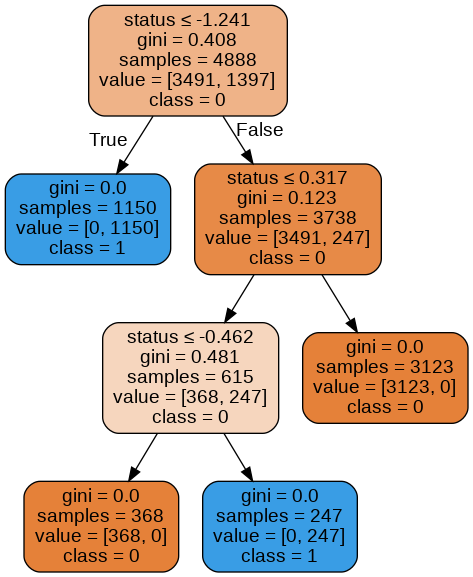

In [139]:
graph.write_png('DT.png')

Image(graph.create_png())


# At each node, we choose the feature f which maximizes the information gain. 

#Here "status" of a start-up seems be the most important feature.

But* it sometimes maybe have the same meaning of "Target".*

#Try other features without status?

In [0]:
X_train2=X_train.drop(['status'],axis=1)

In [141]:
X_train2.head(2)

,category_code,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at,avg_raise_usd,cat_list,float_time_bw_first_rounds
6979,32,1,0,18,43,108,1,183,102,2007.0,865,723,968,1.085854e+07,32,0
4597,36,554,0,8,410,970,3,118,80,2002.0,281,1237,659,7.153554e+06,36,983


In [0]:
X_test2=X_test.drop(['status'],axis=1)

In [143]:
X_train2_std = sc.fit_transform(X_train2)
X_test2_std = sc.transform(X_test2)
print(X_train2_std)

[[ 6.45390662e-01 -1.33800305e+00  0.00000000e+00 ...  6.57208811e-04
   6.45390662e-01 -4.22777775e-01]
 [ 9.21118363e-01 -3.00111087e-01  0.00000000e+00 ... -9.61211205e-02
   9.21118363e-01  1.89859368e+00]
 [ 9.21118363e-01 -7.67672459e-02  0.00000000e+00 ... -2.76449710e-01
   9.21118363e-01 -4.22777775e-01]
 ...
 [-1.28470324e+00  9.31095297e-01  0.00000000e+00 ...  1.02307614e+00
  -1.28470324e+00 -4.22777775e-01]
 [-1.35363517e+00 -3.95829876e-01  0.00000000e+00 ...  2.39442462e-01
  -1.35363517e+00 -4.22777775e-01]
 [-9.40043617e-01  1.90142106e+00  0.00000000e+00 ...  5.86995640e-01
  -9.40043617e-01  3.68330502e-01]]


In [0]:
clf = clf.fit(X_train2_std,y_train)

In [163]:
features2=X_train2.columns.to_list()
print(features2)

['category_code', 'funding_total_usd', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'last_funding_at', 'last_milestone_at', 'avg_raise_usd', 'cat_list', 'float_time_bw_first_rounds']


In [0]:
dot_data2 =StringIO()

In [168]:
export_graphviz(clf,out_file =dot_data2,max_depth=4,feature_names=features2,filled=True,
                rounded=True,special_characters=True,class_names=['0','1'])


graph=pydotplus.graph_from_dot_data(dot_data2.getvalue())
print(graph)

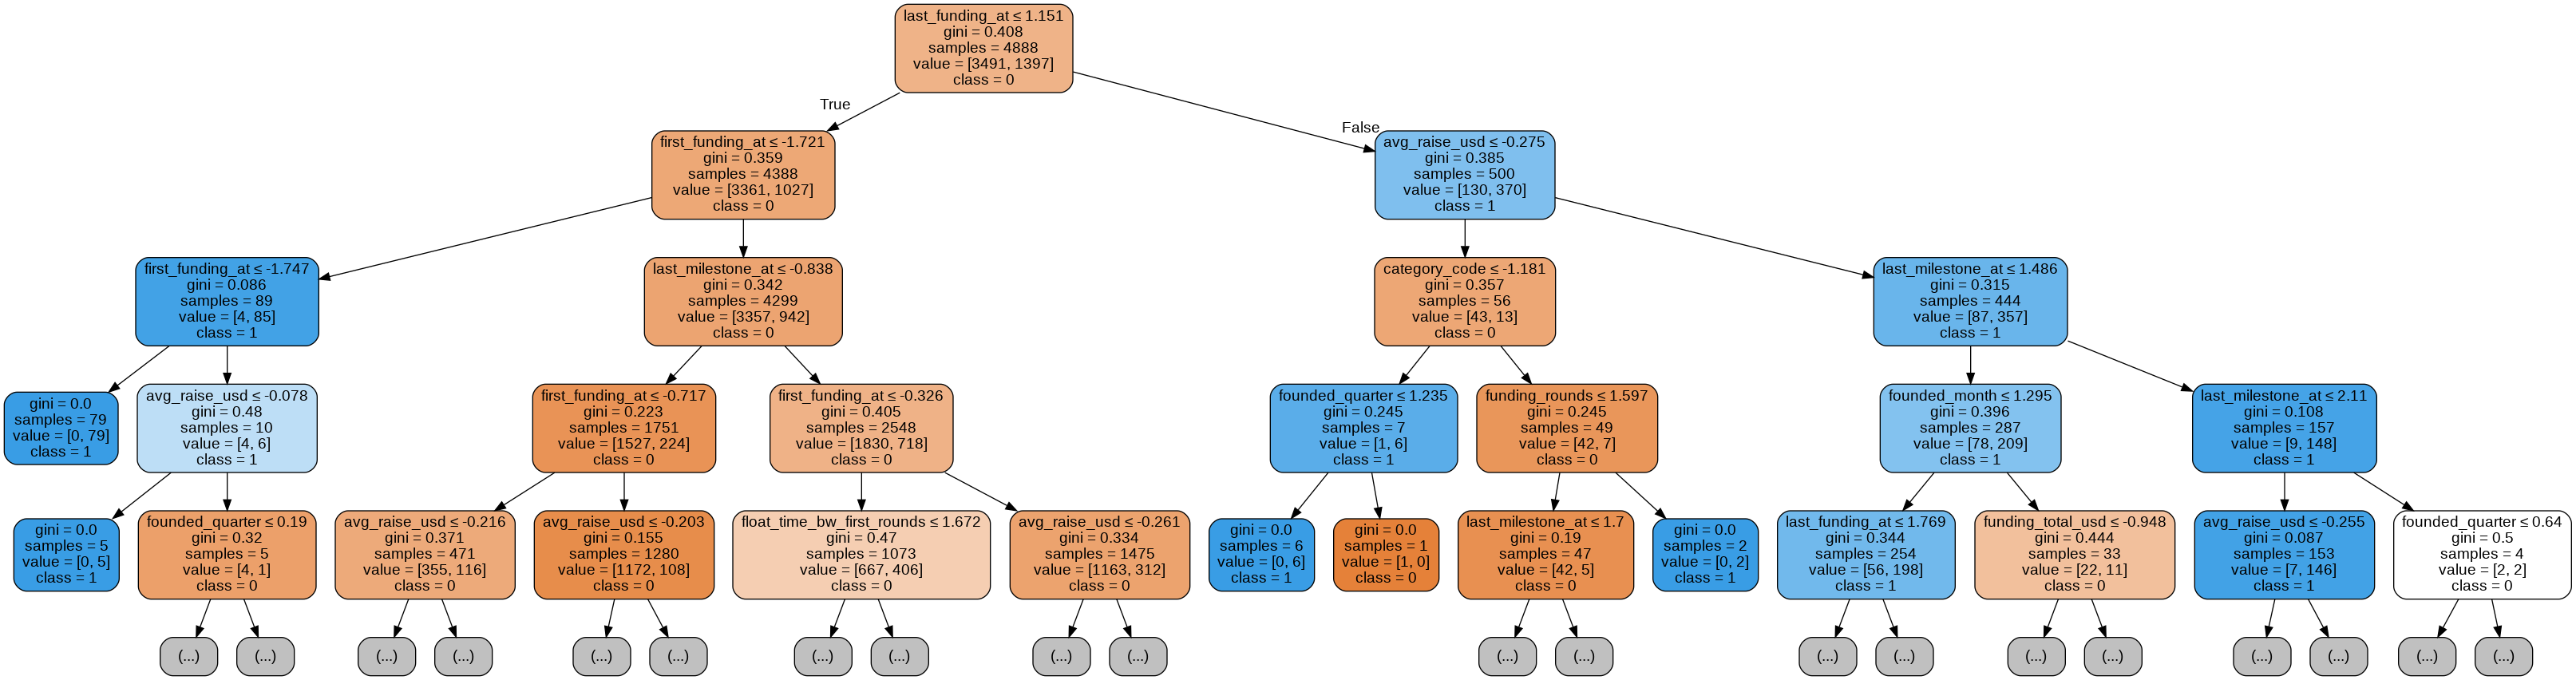

In [169]:
graph.write_png('DT2.pn',)

Image(graph.create_png())

Here "last_funding_at" is most important feature, and  "first_dunding_at"  and "avg_raise_usd" are the second deepth(which means that they are the important ones too).


#It seems that the Timing  is very important for the success!

Then let us do the ramdom forests now.



#Feature Selection Using Random forest

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [203]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train_std, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

Here,SelectFromModel  select those features which importance is greater than the mean importance of all the features by default, but we can alter this threshold if we want.

To see which features are important we can use get_support method on the fitted model.

In [204]:
sel.get_support()

array([False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False])

In [205]:
print(features)

['category_code', 'funding_total_usd', 'status', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'last_funding_at', 'last_milestone_at', 'avg_raise_usd', 'cat_list', 'float_time_bw_first_rounds']


In [211]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)


2

In [212]:
print(selected_feat)

Index(['status', 'last_funding_at'], dtype='object')


In [0]:
import matplotlib.pyplot as plt

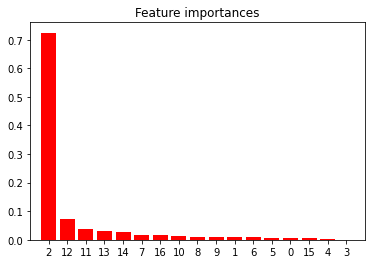

In [221]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

#So we can see that 'status' and 'last_funding_at' are important here.

#It means that if you are alive, you will have more opportunity to success.Just like the period of now.

try without the 'status'

In [206]:
sel2 = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel2.fit(X_train2_std, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [207]:
sel2.get_support()

array([False,  True, False, False, False,  True, False, False, False,
       False,  True,  True,  True,  True, False, False])

In [208]:
print(features2)

['category_code', 'funding_total_usd', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'last_funding_at', 'last_milestone_at', 'avg_raise_usd', 'cat_list', 'float_time_bw_first_rounds']


In [227]:
selected_feat2= X_train2.columns[(sel2.get_support())]
len(selected_feat2)

6

In [228]:
print(selected_feat2)

Index(['funding_total_usd', 'city', 'first_funding_at', 'last_funding_at',
       'last_milestone_at', 'avg_raise_usd'],
      dtype='object')


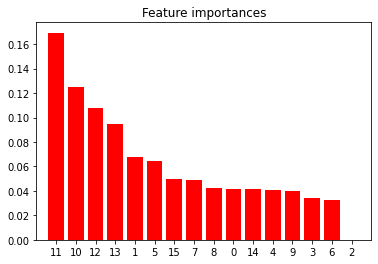

In [229]:
importances = sel2.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train2.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train2.shape[1]), indices)
plt.xlim([-1, X_train2.shape[1]])
plt.show()

#Now,we can see that 'funding_total_usd',  'city',  'first_funding_at',  'last_funding_at', 'last_milestone_at', 'avg_raise_usd' (total 6 features) are important here!

#It means that if you have more enough money to keep alive in your city in the right timing, you will have more opportunity to success.Just like the period of now?

#The most difficult part of the project is how to define the so-called success(‘Target’=0） for a startup? Just keep alive?? Not changing the world?